In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [60]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
df.isnull().sum()  # no missing values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

classification - check if classes are balance or imbalanced
if there is imbalnace 
'pip install imblearn' to handle class- imbalance 

<AxesSubplot:ylabel='count'>

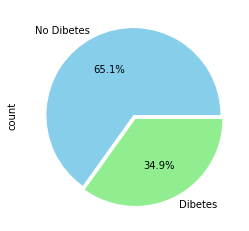

In [62]:
df.Outcome.value_counts().plot(kind='pie', autopct='%.1f%%',
    labels = ['No Dibetes', 'Dibetes'],
    colors = ['skyblue', 'lightgreen'], explode= [0, 0.05])

Importing Libraries

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [82]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("training data =>", X_train.shape, X_test.shape)

training data => (614, 8) (154, 8)


In [65]:
model = Pipeline([
    ('scaler', StandardScaler()),
     ('dt', DecisionTreeClassifier())
])
model

Pipeline(steps=[('scaler', StandardScaler()), ('dt', DecisionTreeClassifier())])

In [66]:
params = {
    'dt__criterion': ['gini', 'entropy', 'log_loss'], 
    'dt__max_depth': list(range(5, 100, 10))
}


grid = GridSearchCV(model, param_grid= params, cv=5, verbose=1)
grid

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

Fitting models 

In [67]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'dt__max_depth': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                           95]},
             verbose=1)

best parameters

In [68]:
grid.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 5}

all the metrics as a deatfreame 

In [69]:
result_df = pd.DataFrame(grid.cv_results_)
result_df.sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018797,0.003059,0.005803,0.001832,gini,5,"{'dt__criterion': 'gini', 'dt__max_depth': 5}",0.707317,0.682927,0.674797,0.739837,0.770492,0.715074,0.035778,1
20,0.009005,0.001101,0.004198,0.001603,log_loss,5,"{'dt__criterion': 'log_loss', 'dt__max_depth': 5}",0.691057,0.650407,0.699187,0.764228,0.762295,0.713435,0.043917,2
10,0.012800,0.001936,0.003805,0.000748,entropy,5,"{'dt__criterion': 'entropy', 'dt__max_depth': 5}",0.699187,0.650407,0.699187,0.764228,0.754098,0.713421,0.041502,3
26,0.013113,0.000468,0.003202,0.000400,log_loss,65,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.699187,0.642276,0.682927,0.747967,0.696721,0.693816,0.033896,4
25,0.012000,0.000628,0.003398,0.000486,log_loss,55,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.707317,0.626016,0.658537,0.731707,0.721311,0.688978,0.040245,5
18,0.012999,0.000636,0.003202,0.000400,entropy,85,"{'dt__criterion': 'entropy', 'dt__max_depth': 85}",0.682927,0.634146,0.674797,0.715447,0.721311,0.685726,0.031424,6
27,0.012402,0.001024,0.003799,0.000405,log_loss,75,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.674797,0.650407,0.674797,0.707317,0.721311,0.685726,0.025373,7
14,0.012599,0.000489,0.003202,0.000400,entropy,45,"{'dt__criterion': 'entropy', 'dt__max_depth': 45}",0.682927,0.634146,0.658537,0.715447,0.729508,0.684113,0.035199,8
29,0.011801,0.000756,0.003603,0.000490,log_loss,95,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.682927,0.626016,0.674797,0.723577,0.713115,0.684086,0.034240,9
21,0.012199,0.001726,0.004206,0.000752,log_loss,15,"{'dt__criterion': 'log_loss', 'dt__max_depth':...",0.699187,0.642276,0.658537,0.707317,0.713115,0.684086,0.028324,10


Extract the best model 

In [70]:
best_model = grid.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=5))])

In [71]:
y_pred = best_model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)
cf

array([[84, 17],
       [18, 35]], dtype=int64)

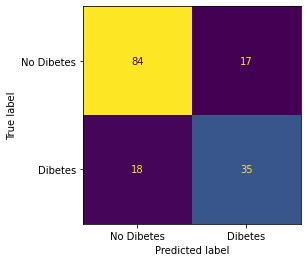

In [72]:
fig, ax = plt.subplots(figsize=(4, 4))
ConfusionMatrixDisplay(cf, display_labels=['No Dibetes', 'Dibetes']).plot(ax=ax, colorbar=False)


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       101
           1       0.67      0.66      0.67        53

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



Plotting grid search result 

<AxesSubplot:>

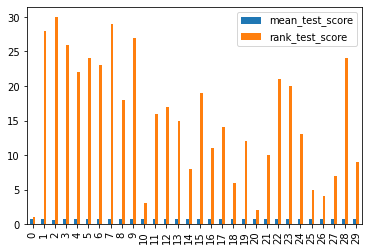

In [74]:
result_df[['mean_test_score', 'rank_test_score']].plot(kind='bar')

<AxesSubplot:>

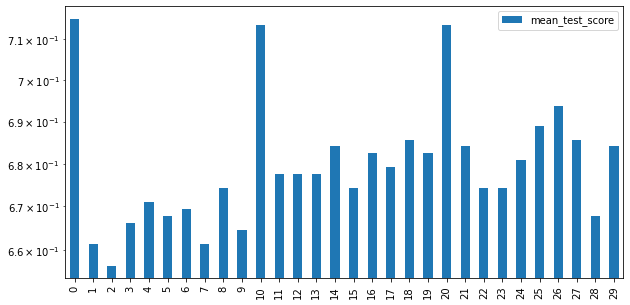

In [75]:
result_df[['mean_test_score']].plot(kind='bar', logy=True, figsize=(10, 5))

In [76]:
import joblib

joblib.dump(best_model, 'dibetes_model.pk1')

['dibetes_model.pk1']

Gradio app generation 

Understanding the Undersampling 

In [77]:
from imblearn.under_sampling import RandomUnderSampler

In [78]:
#rus = RandomUnderSampler()
#print("Before undersampling")
#print(y_train.value_counts())
#X_train, y_train = rus.fit_resample(X_train, y_train)
#print("After  undersampling")
#print(y_train.value_counts())

Before undersampling
Outcome
0    394
1    220
Name: count, dtype: int64
after understanding
Outcome
0    220
1    220
Name: count, dtype: int64


<AxesSubplot:ylabel='count'>

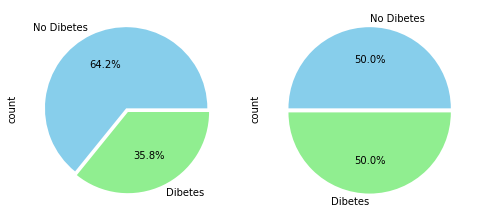

In [83]:
fig, (ax1, ax2) = plt.subplots(figsize= (8, 4), nrows=1, ncols=2)
rus = RandomUnderSampler()
print("Before undersampling")
print(y_train.value_counts())

y_train.value_counts().plot(kind='pie', autopct='%.1f%%',
    labels = ['No Dibetes', 'Dibetes'],
    colors = ['skyblue', 'lightgreen'], explode= [0, 0.05],
    ax=ax1)

X_train, y_train = rus.fit_resample(X_train, y_train)
print('after understanding')
print(y_train.value_counts())
y_train.value_counts().plot(kind='pie', autopct='%.1f%%',
    labels = ['No Dibetes', 'Dibetes'],
    colors = ['skyblue', 'lightgreen'], explode= [0, 0.05],
    ax=ax2)
